# **1. MNIST 데이터셋 학습**

## **1.1 DNN: Tensorflow**

- 각 코드를 함수나 클래스로 묶지 않고 순서대로 풀어서 작성함
- 실무에서 더욱 크고 복잡한 기능을 구현할 때에는 함수나 클래스 등으로 묶어서 작성하는 것을 권장함

In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(6)

In [ ]:
# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 데이터 전처리
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

In [ ]:
# 모델 정의
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(10)
])

In [ ]:
# 모델 컴파일
model.compile(
  optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
)

In [ ]:
# 모델 훈련
model.fit(
  x_train, y_train,
  epochs=5,
  batch_size=128,
  verbose=1
)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.6307 - loss: 1.5478
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.8788 - loss: 0.4785
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.9014 - loss: 0.3653
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9120 - loss: 0.3202
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.9188 - loss: 0.2927


In [ ]:
# 모델 평가
_, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9140 - loss: 0.3026
Accuracy: 0.9265


In [ ]:
# 모델 저장
model.save('model_mnist_dnn_tensorflow.keras')
print('Training finished')

Training finished


- 학습된 모델을 이용한 실제 예측 확인(시각화)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
num_samples = 5
random_indices = np.random.randint(0, len(x_test), num_samples)

In [ ]:
# 지금은 model 변수에 학습된 model이 남아 있으므로 load_model을 할 필요는 없음
# 차후에 이미 학습됨 모델을 사용할 때, load_model 등을 활용할 수 있음

model = tf.keras.models.load_model('model_mnist_dnn_tensorflow.keras')

In [ ]:
plt.figure(figsize=(25, 3))

<Figure size 2500x300 with 0 Axes>

<Figure size 2500x300 with 0 Axes>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


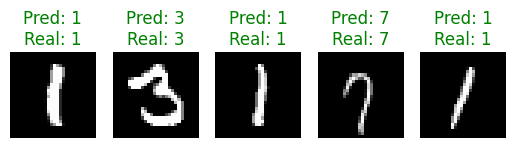

In [ ]:
for i, idx in enumerate(random_indices):
  # 이미지와 실제 레이블
  image = x_test[idx]
  true_label = y_test[idx]

  # 예측
  pred = model.predict(np.expand_dims(image, axis=0))[0]
  predicted_label = np.argmax(pred)
  confidence = np.max(pred) * 100

  # 이미지 시각화
  plt.subplot(1, num_samples, i+1)
  plt.imshow(image.reshape(28, 28), cmap='gray')

  # 예측이 맞았는지 색상으로 표시 (초록: 맞음, 빨강: 틀림)
  title_color = 'green' if predicted_label == true_label else 'red'
  plt.title(f'Pred: {predicted_label}\nReal: {true_label}', color=title_color)
  plt.axis('off')

## **1.2 DNN: PyTorch**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 시드 설정
torch.manual_seed(6)

In [ ]:
# 하이퍼파라미터 설정
batch_size = 128
learning_rate = 0.001
num_epochs = 5

In [ ]:
# 데이터셋 전처리 및 로드
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST 평균과 표준편차
])

In [ ]:
# 학습 및 테스트 데이터 로드
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 57.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.64MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.6MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.62MB/s]


In [ ]:
# DNN 모델 정의
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 1000)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(1000, 1000)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(1000, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

In [ ]:
# 디바이스 설정 (GPU 사용 가능 시)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'사용 중인 디바이스: {device}')

사용 중인 디바이스: cpu


In [ ]:
# 모델 초기화
model = DNN().to(device)

In [ ]:
# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# 모델 학습
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        # 순전파, 역전파, 최적화
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss/100:.4f}')
            running_loss = 0.0

Epoch [1/5], Step [100/469], Loss: 0.3943
Epoch [1/5], Step [200/469], Loss: 0.1832
Epoch [1/5], Step [300/469], Loss: 0.1371
Epoch [1/5], Step [400/469], Loss: 0.1213
Epoch [2/5], Step [100/469], Loss: 0.0841
Epoch [2/5], Step [200/469], Loss: 0.0848
Epoch [2/5], Step [300/469], Loss: 0.0706
Epoch [2/5], Step [400/469], Loss: 0.0807
Epoch [3/5], Step [100/469], Loss: 0.0567
Epoch [3/5], Step [200/469], Loss: 0.0677
Epoch [3/5], Step [300/469], Loss: 0.0547
Epoch [3/5], Step [400/469], Loss: 0.0576
Epoch [4/5], Step [100/469], Loss: 0.0402
Epoch [4/5], Step [200/469], Loss: 0.0372
Epoch [4/5], Step [300/469], Loss: 0.0479
Epoch [4/5], Step [400/469], Loss: 0.0474
Epoch [5/5], Step [100/469], Loss: 0.0297
Epoch [5/5], Step [200/469], Loss: 0.0354
Epoch [5/5], Step [300/469], Loss: 0.0293
Epoch [5/5], Step [400/469], Loss: 0.0403


In [ ]:
# 모델 평가
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'테스트 정확도: {accuracy:.2f}%')

테스트 정확도: 97.93%


In [ ]:
# 모델 저장
torch.save(model.state_dict(), 'model_mnist_dnn_pytorch.pth')
print('모델이 저장되었습니다!')

모델이 저장되었습니다!


- 학습된 모델을 이용한 실제 예측 확인(시각화)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 테스트셋에서 무작위로 샘플 선택
dataiter = iter(test_loader)
images, labels = next(dataiter)

In [ ]:
# 샘플 이미지에 대한 예측
images = images.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

In [ ]:
# 첫 15개 이미지와 예측 결과 시각화
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

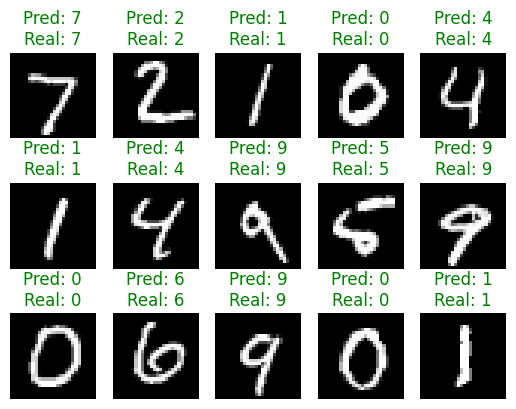

In [ ]:
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(images[i].cpu().squeeze().numpy(), cmap='gray')

    # 예측이 맞았는지 색상으로 표시
    title_color = 'green' if predicted[i] == labels[i] else 'red'
    plt.title(f'Pred: {predicted[i]}\nReal: {labels[i]}', color=title_color)
    plt.axis('off')

## **1.3 CNN: Tensorflow**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 시드 설정
tf.random.set_seed(6)

In [ ]:
# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [ ]:
# 데이터 전처리
# CNN 모델을 위해 이미지 형식으로 reshape (샘플 수, 높이, 너비, 채널)

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [ ]:
# 레이블을 원-핫 인코딩 (선택사항)
# 원-핫 인코딩을 수행했다면 모델 컴파일 시 손실 함수로 CategoricalCrossentropy를 사용할 것
# 원-핫 인코딩을 수행하지 않았다면 모델 컴파일 시 손실 함수로 SparseCategoricalCrossentropy를 사용할 것

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
# CNN 모델 구축
model = models.Sequential([
    # 첫 번째 합성곱 레이어
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # 두 번째 합성곱 레이어
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # 세 번째 합성곱 레이어
    layers.Conv2D(64, (3, 3), activation='relu'),

    # 완전 연결 레이어를 위한 Flatten
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)  # 10개 클래스에 대한 출력
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 모델 컴파일
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    # loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
# 모델 요약 출력
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 학습
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 57s 129ms/step - accuracy: 0.8270 - loss: 0.5696 - val_accuracy: 0.9747 - val_loss: 0.0774
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 107ms/step - accuracy: 0.9801 - loss: 0.0652 - val_accuracy: 0.9878 - val_loss: 0.0424
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 110ms/step - accuracy: 0.9863 - loss: 0.0436 - val_accuracy: 0.9885 - val_loss: 0.0381
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 109ms/step - accuracy: 0.9896 - loss: 0.0331 - val_accuracy: 0.9882 - val_loss: 0.0408
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 108ms/step - accuracy: 0.9917 - loss: 0.0261 - val_accuracy: 0.9892 - val_loss: 0.0401


In [ ]:
# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'테스트 정확도: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9854 - loss: 0.0400
테스트 정확도: 0.9894


In [ ]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

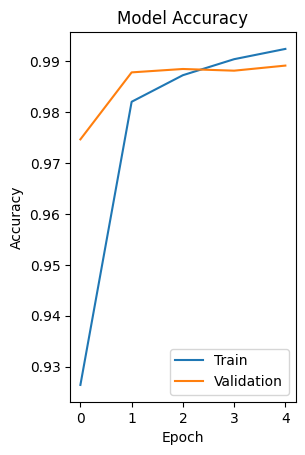

In [ ]:
# 정확도(Accuracy) 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

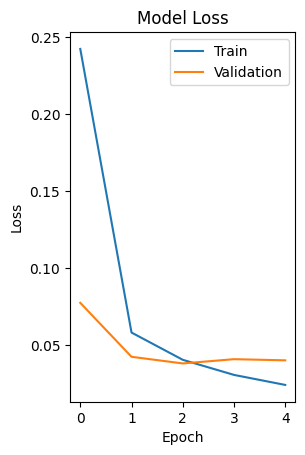

In [ ]:
# 손실(Loss) 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
# 모델 저장
model.save('model_mnist_cnn_tensorflow.keras')
print('모델이 저장되었습니다!')

모델이 저장되었습니다!


- 학습된 모델을 이용한 실제 예측 확인(시각화)

In [ ]:
num_samples = 5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


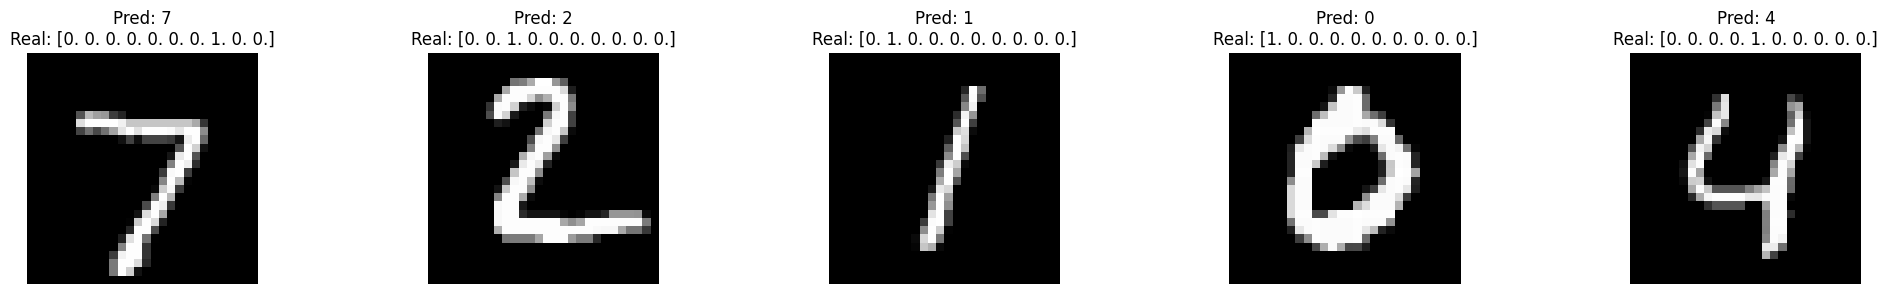

In [ ]:
predictions = model.predict(x_test[:num_samples])
predictions = np.argmax(predictions, axis=1)

plt.figure(figsize=(25, 3))

for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {predictions[i]}\nReal: {y_test[i]}')
    plt.axis('off')

## **1.4 CNN: PyTorch**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [ ]:
# GPU 사용 가능 여부 확인
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'사용 중인 디바이스: {device}')

사용 중인 디바이스: cpu


In [ ]:
# 하이퍼파라미터 설정
batch_size = 128
learning_rate = 0.001
num_epochs = 5

In [ ]:
# 데이터셋 전처리 및 로드
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST 데이터셋의 평균과 표준편차
])

In [ ]:
# 학습 데이터 로드
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

In [ ]:
# 테스트 데이터 로드
test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=transform,
    download=True
)

In [ ]:
# 데이터 로더 설정
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)

In [ ]:
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

In [ ]:
# CNN 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # 첫 번째 합성곱 레이어
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)  # 출력 크기: 14x14
        )

        # 두 번째 합성곱 레이어
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)  # 출력 크기: 7x7
        )

        # 완전 연결 레이어
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # 합성곱 레이어 통과
        x = self.conv1(x)
        x = self.conv2(x)

        # 텐서 평탄화
        x = x.view(x.size(0), -1)

        # 완전 연결 레이어 통과
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        return x

In [ ]:
# 모델 초기화
model = CNN().to(device)

In [ ]:
# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# 모델 학습
total_step = len(train_loader)
for epoch in range(num_epochs):
    model.train()  # 학습 모드 설정
    for i, (images, labels) in enumerate(train_loader):
        # GPU로 데이터 이동
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [100/469], Loss: 0.1339
Epoch [1/5], Step [200/469], Loss: 0.1231
Epoch [1/5], Step [300/469], Loss: 0.0755
Epoch [1/5], Step [400/469], Loss: 0.0611
Epoch [2/5], Step [100/469], Loss: 0.0466
Epoch [2/5], Step [200/469], Loss: 0.0385
Epoch [2/5], Step [300/469], Loss: 0.0121
Epoch [2/5], Step [400/469], Loss: 0.0320
Epoch [3/5], Step [100/469], Loss: 0.0108
Epoch [3/5], Step [200/469], Loss: 0.0188
Epoch [3/5], Step [300/469], Loss: 0.1241
Epoch [3/5], Step [400/469], Loss: 0.0725
Epoch [4/5], Step [100/469], Loss: 0.0094
Epoch [4/5], Step [200/469], Loss: 0.0253
Epoch [4/5], Step [300/469], Loss: 0.0303
Epoch [4/5], Step [400/469], Loss: 0.0052
Epoch [5/5], Step [100/469], Loss: 0.0228
Epoch [5/5], Step [200/469], Loss: 0.0363
Epoch [5/5], Step [300/469], Loss: 0.0229
Epoch [5/5], Step [400/469], Loss: 0.0228


In [ ]:
# 모델 평가
model.eval()  # 평가 모드 설정
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'테스트 정확도: {100 * correct / total:.2f}%')

테스트 정확도: 98.90%


In [ ]:
# 모델 저장
torch.save(model.state_dict(), 'model_mnist_cnn_pytorch.pth')
print('모델이 저장되었습니다!')

모델이 저장되었습니다!


- 학습된 모델을 이용한 실제 예측 확인(시각화)

In [ ]:
# 테스트셋에서 무작위로 샘플 선택
dataiter = iter(test_loader)
images, labels = next(dataiter)

In [ ]:
# 샘플 이미지에 대한 예측
images = images.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

In [ ]:
# 첫 15개 이미지와 예측 결과 시각화
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

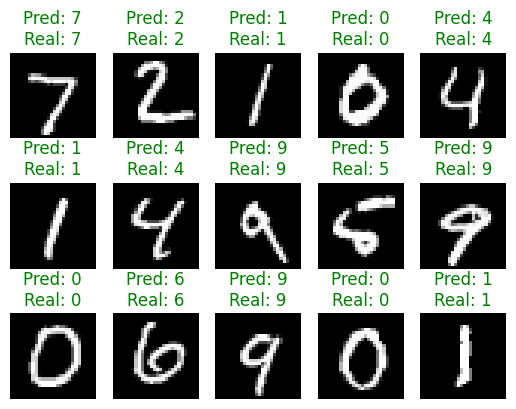

In [ ]:
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(images[i].cpu().squeeze().numpy(), cmap='gray')

    # 예측이 맞았는지 색상으로 표시
    title_color = 'green' if predicted[i] == labels[i] else 'red'
    plt.title(f'Pred: {predicted[i]}\nReal: {labels[i]}', color=title_color)
    plt.axis('off')

# **2. HouseSales 데이터셋 학습**

## **2.1 DNN: Tensorflow**

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
def load_house_data(file_path='https://raw.githubusercontent.com/SkyLectures/LectureMaterials/refs/heads/main/datasets/S03-10-02-02_01-kc_house_data.csv'):
    # 데이터 읽기
    df = pd.read_csv(file_path)

    # 필요없는 컬럼 제거
    df = df.drop(['id', 'date'], axis=1)

    # 결측치 처리
    df = df.dropna()

    # 이상치 확인 및 제거 (선택적)
    # 예: 가격이 너무 높거나 낮은 경우 제거
    q_low = df['price'].quantile(0.01)
    q_high = df['price'].quantile(0.99)
    df = df[(df['price'] > q_low) & (df['price'] < q_high)]

    # 특성(X)과 타겟(y) 분리
    X = df.drop('price', axis=1)
    y = df['price']

    # 학습 및 테스트 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

    # 특성 스케일링 (표준화)
    scaler_X = StandardScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test = scaler_X.transform(X_test)

    # 타겟 변수도 스케일링 (회귀 문제에서는 타겟도 스케일링하는 것이 중요)
    scaler_y = StandardScaler()
    y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
    y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

    # NaN 값이 있는지 확인
    print("X_train NaN 개수:", np.isnan(X_train).sum())
    print("y_train NaN 개수:", np.isnan(y_train).sum())

    return X_train, X_test, y_train, y_test, scaler_y

In [ ]:
def training(save_path='model_house_sales_dnn_tensorflow.keras'):
    # 데이터 로드
    X_train, X_test, y_train, y_test, scaler_y = load_house_data()

    # 입력 특성 수 확인
    input_dim = X_train.shape[1]

    # 모델 정의 (더 안정적인 구조)
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=(input_dim,),
                             kernel_initializer='he_normal'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation='relu',
                             kernel_initializer='he_normal'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64, activation='relu',
                             kernel_initializer='he_normal'),
        tf.keras.layers.Dense(1)  # 회귀 문제이므로 출력층은 하나의 노드
    ])

    # 모델 컴파일 (옵티마이저 변경 및 학습률 감소)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)  # 그래디언트 클리핑 추가
    model.compile(
        optimizer=optimizer,
        loss='mse',  # Mean Squared Error
        metrics=['mae']  # Mean Absolute Error
    )

    # 콜백 추가 (학습이 불안정할 때 조기 종료)
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=10, restore_best_weights=True
    )

    # 모델 훈련
    history = model.fit(
        X_train, y_train,
        epochs=50,  # 더 많은 에폭 설정
        batch_size=32,  # 배치 사이즈 감소
        verbose=1,
        validation_split=0.1,
        callbacks=[early_stopping]
    )

    # 모델 평가
    loss, mae = model.evaluate(X_test, y_test)
    print(f'테스트 손실(스케일링된 데이터): {loss:.2f}')
    print(f'테스트 MAE(스케일링된 데이터): {mae:.2f}')

    # 원래 스케일로 예측 결과 변환하여 평가
    y_pred = model.predict(X_test)
    y_pred_original = scaler_y.inverse_transform(y_pred)
    y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1))

    # 원래 스케일에서의 MAE 계산
    mae_original = np.mean(np.abs(y_pred_original - y_test_original))
    print(f'테스트 MAE(원래 스케일): ${mae_original:.2f}')

    # 모델 저장
    model.save(save_path)
    print('Training finished')

    return model, scaler_y

In [ ]:
# 직접 실행
model, scaler_y = training()

X_train NaN 개수: 0
y_train NaN 개수: 0
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


477/477 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.5363 - mae: 0.5111 - val_loss: 0.2662 - val_mae: 0.3292
Epoch 2/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2215 - mae: 0.3301 - val_loss: 0.1838 - val_mae: 0.2819
Epoch 3/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1985 - mae: 0.3047 - val_loss: 0.1559 - val_mae: 0.2584
Epoch 4/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1757 - mae: 0.2910 - val_loss: 0.1829 - val_mae: 0.2699
Epoch 5/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1775 - mae: 0.2882 - val_loss: 0.2092 - val_mae: 0.2618
Epoch 6/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1560 - mae: 0.2724 - val_loss: 0.2313 - val_mae: 0.2741
Epoch 7/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1627 - mae: 0.2746 - val_loss: 0.1737 - val_mae: 0.2679
Epoch 8/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1515 - mae: 0.2656 - val_loss: 0.1690 - val_mae: 0.2470
Epoch 9/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1458 

In [ ]:
# 예측 예시
X_train, X_test, y_train, y_test, _ = load_house_data()

X_train NaN 개수: 0
y_train NaN 개수: 0


In [ ]:
# 테스트 데이터 중 일부 샘플에 대해 예측
sample_count = 5
sample_indices = np.random.randint(0, len(X_test), sample_count)

sample_X = X_test[sample_indices]
sample_y = y_test[sample_indices]

predictions = model.predict(sample_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


In [ ]:
# 원래 스케일로 변환
sample_y_original = scaler_y.inverse_transform(sample_y.reshape(-1, 1))
predictions_original = scaler_y.inverse_transform(predictions)

In [ ]:
# 결과 출력
print("\n예측 결과 비교:")
print("실제 가격\t\t예측 가격\t\t차이")
print("-" * 60)
for i in range(sample_count):
    actual = sample_y_original[i][0]
    predicted = predictions_original[i][0]
    diff = abs(actual - predicted)
    print(f"${actual:.2f}\t\t${predicted:.2f}\t\t${diff:.2f}")


예측 결과 비교:
실제 가격		예측 가격		차이
------------------------------------------------------------
$329999.00		$311005.81		$18993.19
$475000.00		$507536.09		$32536.09
$425000.00		$420240.00		$4760.00
$709950.00		$750064.31		$40114.31
$609500.00		$580587.81		$28912.19


## **2.2 DNN: Pytorch**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 시드 설정
torch.manual_seed(6)

In [ ]:
# 하이퍼파라미터 설정
batch_size = 32
learning_rate = 0.001
num_epochs = 5

In [ ]:
# 데이터셋 클래스 정의
class HouseSalesDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.targets = torch.tensor(targets, dtype=torch.float32).reshape(-1, 1)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

In [ ]:
# 데이터 로드 및 전처리 함수
def load_house_data(file_path='https://raw.githubusercontent.com/SkyLectures/LectureMaterials/refs/heads/main/datasets/S03-10-02-02_01-kc_house_data.csv'):
    # 데이터 읽기
    df = pd.read_csv(file_path)

    # 필요없는 컬럼 제거
    df = df.drop(['id', 'date'], axis=1)

    # 결측치 처리
    df = df.dropna()

    # 이상치 제거 (가격 기준 상하위 1% 제거)
    q_low = df['price'].quantile(0.01)
    q_high = df['price'].quantile(0.99)
    df = df[(df['price'] > q_low) & (df['price'] < q_high)]

    # 특성(X)과 타겟(y) 분리
    X = df.drop('price', axis=1)
    y = df['price']

    # 학습 및 테스트 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

    # 특성 스케일링 (표준화)
    scaler_X = StandardScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test = scaler_X.transform(X_test)

    # 타겟 변수도 스케일링 (회귀 문제에서는 타겟도 스케일링하는 것이 중요)
    scaler_y = StandardScaler()
    y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
    y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

    return X_train, X_test, y_train, y_test, scaler_y

In [ ]:
# 신경망 모델 정의
class HousePriceModel(nn.Module):
    def __init__(self, input_dim):
        super(HousePriceModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, 256)
        self.batch_norm1 = nn.BatchNorm1d(256)
        self.layer2 = nn.Linear(256, 128)
        self.batch_norm2 = nn.BatchNorm1d(128)
        self.layer3 = nn.Linear(128, 64)
        self.batch_norm3 = nn.BatchNorm1d(64)
        self.layer4 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.batch_norm1(self.layer1(x)))
        x = self.relu(self.batch_norm2(self.layer2(x)))
        x = self.relu(self.batch_norm3(self.layer3(x)))
        x = self.layer4(x)
        return x

In [ ]:
def training():
    # 데이터 로드
    X_train, X_test, y_train, y_test, scaler_y = load_house_data()

    # 디바이스 설정 (GPU 사용 가능 시)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f'사용 중인 디바이스: {device}')

    # 데이터셋 및 데이터로더 생성
    train_dataset = HouseSalesDataset(X_train, y_train)
    test_dataset = HouseSalesDataset(X_test, y_test)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    # 모델 초기화
    input_dim = X_train.shape[1]
    model = HousePriceModel(input_dim).to(device)

    # 손실 함수와 옵티마이저 정의
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # 학습 기록 저장용
    train_losses = []

    # 모델 학습
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for features, targets in train_loader:
            features, targets = features.to(device), targets.to(device)

            # Forward pass
            outputs = model(features)
            loss = criterion(outputs, targets)

            # Backward pass and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}')

    # 모델 평가
    model.eval()
    with torch.no_grad():
        test_loss = 0.0
        mae = 0.0

        for features, targets in test_loader:
            features, targets = features.to(device), targets.to(device)
            outputs = model(features)

            # MSE 계산
            test_loss += criterion(outputs, targets).item()

            # MAE 계산
            mae += torch.mean(torch.abs(outputs - targets)).item()

        avg_test_loss = test_loss / len(test_loader)
        avg_mae = mae / len(test_loader)

        print(f'테스트 손실(스케일링된 데이터): {avg_test_loss:.4f}')
        print(f'테스트 MAE(스케일링된 데이터): {avg_mae:.4f}')

    # 원래 스케일로 예측 결과 변환하여 평가
    model.eval()
    all_targets = []
    all_predictions = []

    with torch.no_grad():
        for features, targets in test_loader:
            features, targets = features.to(device), targets.to(device)

            outputs = model(features)
            all_targets.append(targets.cpu().numpy())
            all_predictions.append(outputs.cpu().numpy())

    # 예측 결과와 실제 값을 numpy 배열로 변환
    all_targets = np.vstack(all_targets)
    all_predictions = np.vstack(all_predictions)

    # 원래 스케일로 변환
    all_targets_original = scaler_y.inverse_transform(all_targets)
    all_predictions_original = scaler_y.inverse_transform(all_predictions)

    # 원래 스케일에서의 MAE 계산
    mae_original = np.mean(np.abs(all_predictions_original - all_targets_original))
    print(f'테스트 MAE(원래 스케일): ${mae_original:.2f}')

    # 학습 곡선 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), train_losses, marker='o')
    plt.title('Learning Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

    # 예측 결과 시각화
    plt.figure(figsize=(10, 6))
    plt.scatter(all_targets_original, all_predictions_original, alpha=0.5)
    plt.plot([all_targets_original.min(), all_targets_original.max()],
             [all_targets_original.min(), all_targets_original.max()], 'r--')
    plt.xlabel('Real Price')
    plt.ylabel('Predicted Price')
    plt.title('Real Price vs Predicted Price')
    plt.grid(True)
    plt.show()

    # 모델 저장
    torch.save(model.state_dict(), 'model_house_sales_dnn_pytorch.pth')
    print('모델이 저장되었습니다!')

    return model, scaler_y

사용 중인 디바이스: cpu
Epoch [1/5], Loss: 0.2720
Epoch [2/5], Loss: 0.2152
Epoch [3/5], Loss: 0.1977
Epoch [4/5], Loss: 0.1872
Epoch [5/5], Loss: 0.1831
테스트 손실(스케일링된 데이터): 0.1390
테스트 MAE(스케일링된 데이터): 0.2438
테스트 MAE(원래 스케일): $69158.61


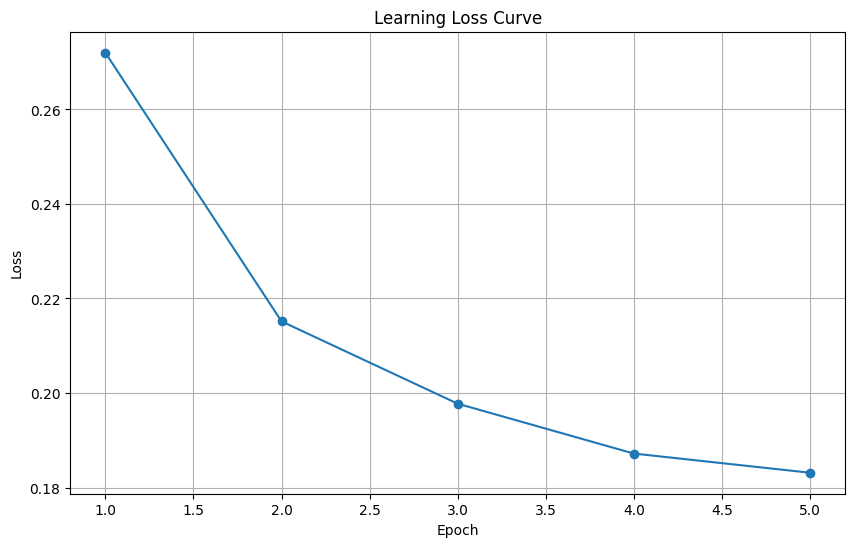

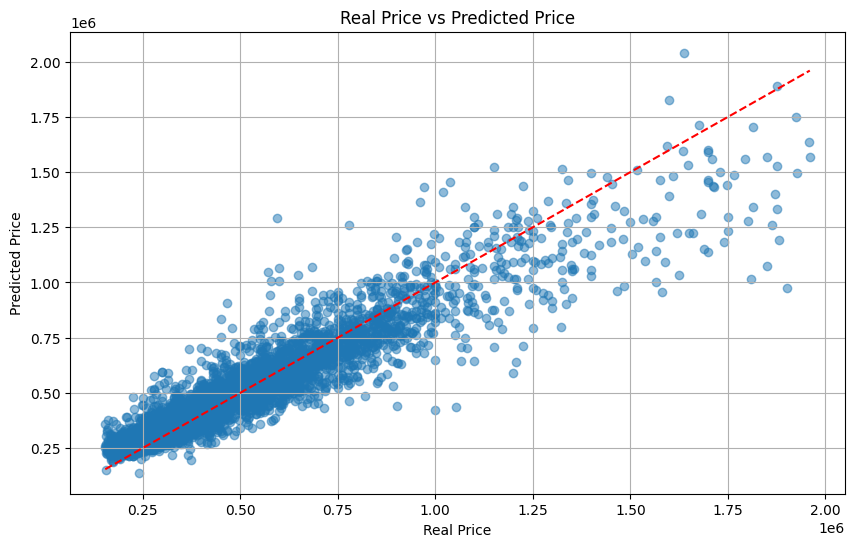

모델이 저장되었습니다!


In [ ]:
model, scaler_y = training()

In [ ]:
# 예측 예시 (몇 가지 샘플에 대한 예측)
def predict_sample(model, scaler_y, num_samples=5):
  # 데이터 로드
  X_train, X_test, y_train, y_test, _ = load_house_data()

  # 샘플 선택
  indices = np.random.randint(0, len(X_test), num_samples)
  sample_X = X_test[indices]
  sample_y = y_test[indices]

  # 텐서로 변환
  sample_X_tensor = torch.tensor(sample_X, dtype=torch.float32).to(device)

  # 예측
  model.eval()
  with torch.no_grad():
      predictions = model(sample_X_tensor)

  # 원래 스케일로 변환
  sample_y_original = scaler_y.inverse_transform(sample_y.reshape(-1, 1))
  predictions_original = scaler_y.inverse_transform(predictions.cpu().numpy())

  # 결과 출력
  print("\n예측 결과 비교:")
  print("실제 가격\t\t예측 가격\t\t차이")
  print("-" * 60)
  for i in range(num_samples):
    actual = sample_y_original[i][0]
    predicted = predictions_original[i][0]
    diff = abs(actual - predicted)
    print(f"${actual:.2f}\t\t${predicted:.2f}\t\t${diff:.2f}")

In [ ]:
# 샘플 예측 실행
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
predict_sample(model, scaler_y)


예측 결과 비교:
실제 가격		예측 가격		차이
------------------------------------------------------------
$641000.00		$639732.44		$1267.56
$850000.00		$875394.31		$25394.31
$375000.00		$411461.84		$36461.84
$471000.00		$519734.03		$48734.03
$406500.00		$331497.00		$75003.00
